---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - Serum triglycerides, mg/dl
> Triglycerides are an important measure of heart health.
>
> Triglycerides are a type of fat (lipid) found in your blood.
>
> Having a high level of triglycerides in your blood can increase your risk of heart disease.
>
> https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186

* APOE -  Apolipoprotein E genotype
> Apolipoprotein E, APOE - the protein which included to the metabilosm.
>
> This protein involeved into some deseases development (written below).
>
> The apolipoprotein E (APOE) genotype is a genetic risk factor for dementia, Alzheimer’s disease, and cardiovascular disease (CVD).
>
> It includes three alleles (e2, e3, e4) that are located on chromosome 19q3.2.
>
> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2908458/

* rs174548 - Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
> rs174548 was associated with both PUFAs (polyunsaturated fatty acids) and lung cancer (https://pubmed.ncbi.nlm.nih.gov/28968813/).
>
> Nearby Gene: FADS1 - fatty acid desaturase 1 (https://www.infino.me/snp/rs174548/)
>
> 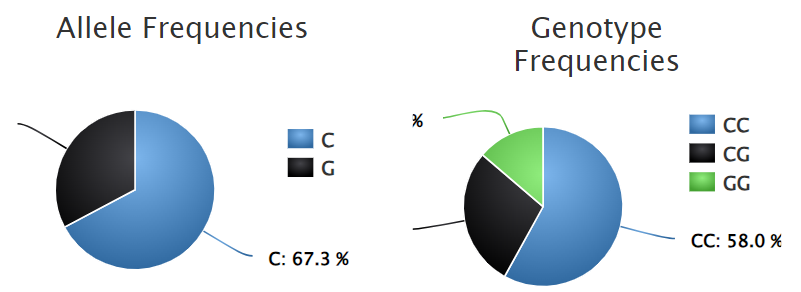

* rs4775041 - Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496
> Plasma HDL-C levels were higher in subjects homozygous for the minor alleles of rs4775041.
>
> \# Холестерин-ЛПВП (Холестерин липопротеинов высокой плотности, HDL Cholesterol)
>
> https://pubmed.ncbi.nlm.nih.gov/19734193/

You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 24.3MB/s]


In [ ]:
!ls # everything has been successfully downloaded

Data-Cholesterol-V2.csv  sample_data


In [ ]:
# Exploratory data analysis (EDA)

import pandas as pd

# load the dataset (df stands for the DataFrame)
df = pd.read_csv("Data-Cholesterol-V2.csv")

# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

# print some lines (the number of observations is 399)
print(df.head(n=6))
print(df.tail(n=3))

Rows x columns: (400, 10)
   DM  age  chol   BMI   TG  APOE  rs174548  rs4775041  HTN  chd
0   1   74   215  26.2  367     4         1          2    1    1
1   1   51   204  24.7  150     4         2          1    1    1
2   0   64   205  24.2  213     4         0          1    1    0
3   0   34   182  23.8  111     2         1          1    1    0
4   1   52   175  34.1  328     2         0          0    1    0
5   1   39   176  22.7   53     4         0          2    0    0
     DM  age  chol   BMI   TG  APOE  rs174548  rs4775041  HTN  chd
397   1   33   180  20.6   56     4         0          1    1    0
398   1   78   212  24.0  273     4         1          0    1    0
399   0   43   220  21.4   91     5         0          1    1    1


[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

In [ ]:
df.info() #integer for each value except BMI (float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DM         400 non-null    int64  
 1   age        400 non-null    int64  
 2   chol       400 non-null    int64  
 3   BMI        363 non-null    float64
 4   TG         400 non-null    int64  
 5   APOE       400 non-null    int64  
 6   rs174548   400 non-null    int64  
 7   rs4775041  400 non-null    int64  
 8   HTN        400 non-null    int64  
 9   chd        400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


In [ ]:
df.dtypes  #integer for each value except BMI (float)

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object

In [ ]:
df.isnull().sum() # BMI has NaN values

DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

In [ ]:
# There are not much NaNs - let's drop them

df.dropna(axis=0, how='any', inplace=True) #удаляет все строки, где есть хотя бы один NaN, сохраняет изменения в df
df #363 rows / 400 rows (NaNs were successfully deleted)

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
394,1,79,161,27.2,257,4,1,0,1,0
395,0,71,169,25.8,322,4,0,0,1,0
397,1,33,180,20.6,56,4,0,1,1,0
398,1,78,212,24.0,273,4,1,0,1,0


In [ ]:
# Each categorical column has type integer (0 or 1)
# It seems ok for me to work with categorical columns without any changes (on this step)


# By the way, it is possible to change the type of columns into 'categorical' (shown below)

# df['DM'] = df['DM'].astype('category')
# df['APOE'] = df['APOE'].astype('category')
# df['rs174548'] = df['rs174548'].astype('category')
# df['rs4775041'] = df['rs4775041'].astype('category')
# df['HTN'] = df['HTN'].astype('category')
# df['chd'] = df['chd'].astype('category')

#df.dtypes

Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

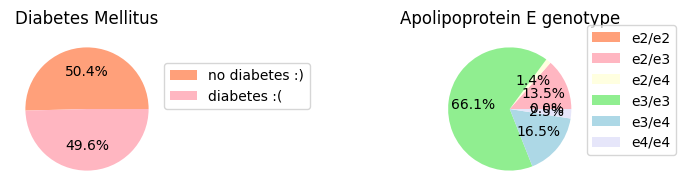

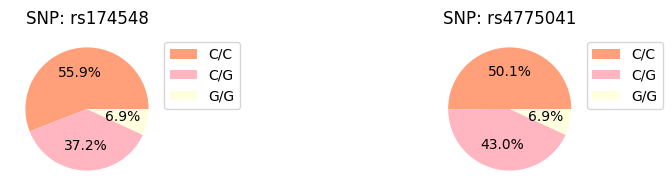

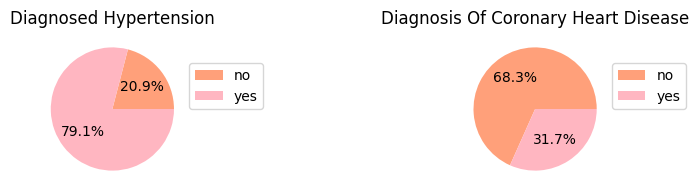

In [ ]:
from pickle import TRUE
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(10,2))

# DM:
a = len(df[df['DM'] == 0])
b = len(df[df['DM'] == 1])
x = [a, b]

labels = ['no diabetes :)', 'diabetes :(']
colors = ['lightsalmon', 'lightpink']

ax[0].pie(x, colors = colors, autopct='%1.1f%%')
ax[0].set_title('Diabetes Mellitus', color = 'black')
ax[0].legend(labels, loc = (1, 0.5))

# APOE:
a = len(df[df['APOE'] == 1])
b = len(df[df['APOE'] == 2])
c = len(df[df['APOE'] == 3])
d = len(df[df['APOE'] == 4])
e = len(df[df['APOE'] == 5])
f = len(df[df['APOE'] == 6])
x = [a, b, c, d, e, f]

labels = ['e2/e2', 'e2/e3', 'e2/e4', 'e3/e3', 'e3/e4', 'e4/e4']
colors = ['lightsalmon', 'lightpink', 'lightyellow', 'lightgreen', 'lightblue', 'lavender']

ax[1].pie(x, colors = colors, autopct='%1.1f%%')
ax[1].set_title('Apolipoprotein E genotype', color = 'black')
ax[1].legend(labels, loc = (1, 0.2))

plt.show()


fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(10,2))

# rs174548:
a = len(df[df['rs174548'] == 0])
b = len(df[df['rs174548'] == 1])
c = len(df[df['rs174548'] == 2])
x = [a, b, c]

labels = ['C/C', 'C/G', 'G/G']
colors = ['lightsalmon', 'lightpink', 'lightyellow']

ax[0].pie(x, colors = colors, autopct='%1.1f%%')
ax[0].set_title('SNP: rs174548', color = 'black')
ax[0].legend(labels, loc = (1, 0.5))

# rs4775041:
a = len(df[df['rs4775041'] == 0])
b = len(df[df['rs4775041'] == 1])
c = len(df[df['rs4775041'] == 2])
x = [a, b, c]

labels = ['C/C', 'C/G', 'G/G']
colors = ['lightsalmon', 'lightpink', 'lightyellow']

ax[1].pie(x, colors = colors, autopct='%1.1f%%')
ax[1].set_title('SNP: rs4775041', color = 'black')
ax[1].legend(labels, loc = (1, 0.5))

plt.show()


fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(10,2))

# HTN: diagnosed hypertension
a = len(df[df['HTN'] == 0])
b = len(df[df['HTN'] == 1])
x = [a, b]

labels = ['no', 'yes']
colors = ['lightsalmon', 'lightpink']

ax[0].pie(x, colors = colors, autopct='%1.1f%%')
ax[0].set_title('Diagnosed Hypertension', color = 'black')
ax[0].legend(labels, loc = (1, 0.5))

# chd:
a = len(df[df['chd'] == 0])
b = len(df[df['chd'] == 1])
x = [a, b]

labels = ['no', 'yes']
colors = ['lightsalmon', 'lightpink']

ax[1].pie(x, colors = colors, autopct='%1.1f%%')
ax[1].set_title('Diagnosis Of Coronary Heart Disease', color = 'black')
ax[1].legend(labels, loc = (1, 0.5))

plt.show()


> **Анализ:**
>
>1) Выборка содержит приблизительно равное количество здоровых и больных диабетом.
>
>2) Самый распространенный Е гаплотип - е3/е3
>
>3) Среди SNP наиболее распространены одинаковые аллели (С/С)
>
>4) Гипертензия диагностирована у почти 80% людей
>
>5) Каридоваскулярные заболевания имеют около 70% людей

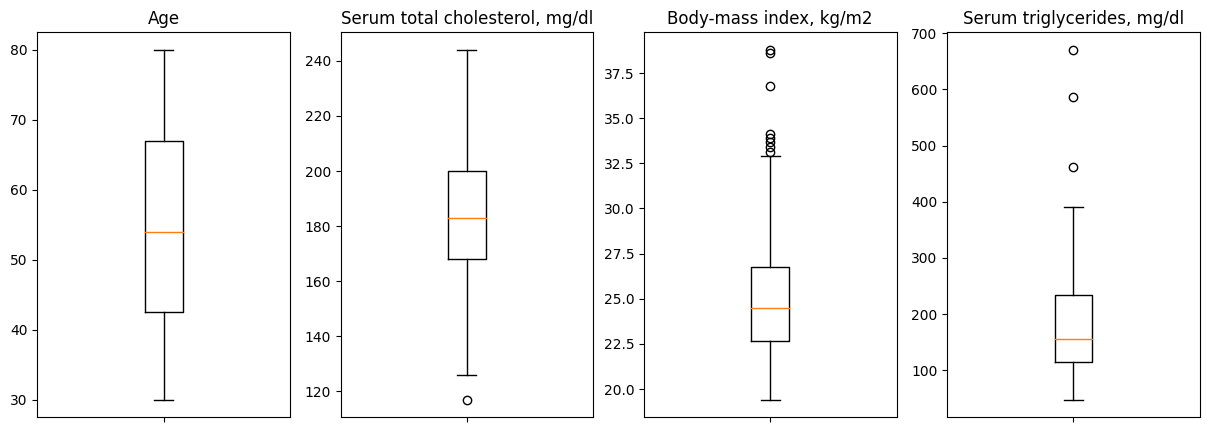

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(15,5))
# age:
ax[0].boxplot(df['age'])
ax[0].set_title('Age', color = 'black')
ax[0].set_xticklabels([]) #removes x-labels

# chol:
ax[1].boxplot(df['chol'])
ax[1].set_title('Serum total cholesterol, mg/dl', color = 'black')
ax[1].set_xticklabels([]) #removes x-labels

# BMI:
ax[2].boxplot(df['BMI'])
ax[2].set_title('Body-mass index, kg/m2', color = 'black')
ax[2].set_xticklabels([]) #removes x-labels

# TG:
ax[3].boxplot(df['TG'])
ax[3].set_title('Serum triglycerides, mg/dl', color = 'black')
ax[3].set_xticklabels([]) #removes x-labels
plt.show()

> **Анализ:**
>
>1) Диапазон возрастов пациентов от 30 до 80, в среднем около 54 лет
>
>2) Остальные показатели тоже достаточно вариативны для разных пациентов. Следовательно, выборка хорошая.


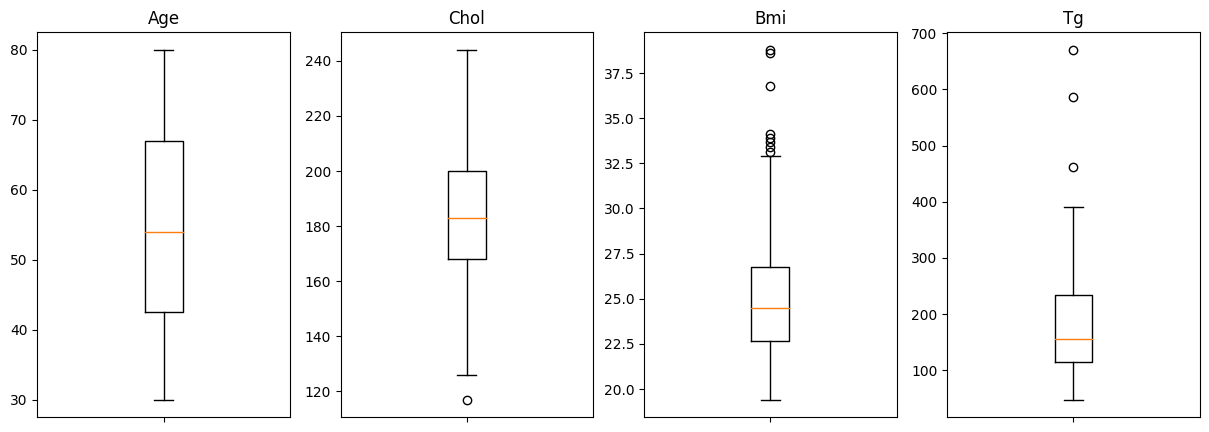

In [ ]:
# Еще я умею делать это в цикле

fig, axs = plt.subplots(ncols=4, figsize=(15,5))

for i, col in enumerate(['age', 'chol', 'BMI', 'TG']):
    axs[i].boxplot(df[col])
    axs[i].set_title(col.capitalize(), color='black')
    axs[i].set_xticklabels([]) #removes x-labels

plt.show()

In [ ]:
df[['age', 'chol', 'BMI', 'TG']].describe()

,age,chol,BMI,TG
count,363.000000,363.000000,363.000000,363.000000
mean,54.487603,183.674931,24.954821,177.834711
std,14.412883,22.219625,3.120144,87.905149
min,30.000000,117.000000,19.400000,47.000000
25%,42.500000,168.000000,22.650000,113.500000
50%,54.000000,183.000000,24.500000,156.000000
75%,67.000000,200.000000,26.750000,233.000000
max,80.000000,244.000000,38.800000,671.000000


[0.5] Is there anything strange about any of the features? If yes, what can be done?

In [ ]:
# Аутлайеры есть в chol, BMI, TG - от аутлайеров нужно избавиться

print(f"Records before: {len(df)}")

# Get 0.01 and 0.99 percentile for each column, alpha = 0.01
low, high = 0.01, 0.99
quantiles = df.quantile([low, high])

# Remove Year column from the 'trimming' procedure
quantiles.drop(columns=['DM', 'age', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd'], inplace=True)

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] >= low) & (df[col] <= high)
  df = df[mask]

print(f"Records after: {len(df)}")

Records before: 363
Records after: 340


[0.75] Explore the relationship of features and interpret it if possible.

In [ ]:
# В этом пункте исключаем категориальные переменные (я просто прописываю везде некатегориальные)
# Можно было написать этот код, но почему-то не зохотелось (меняет тип целевых переменных):

# df['DM'] = df['DM'].astype('category')
# df['APOE'] = df['APOE'].astype('category')
# df['rs174548'] = df['rs174548'].astype('category')
# df['rs4775041'] = df['rs4775041'].astype('category')
# df['HTN'] = df['HTN'].astype('category')
# df['chd'] = df['chd'].astype('category')

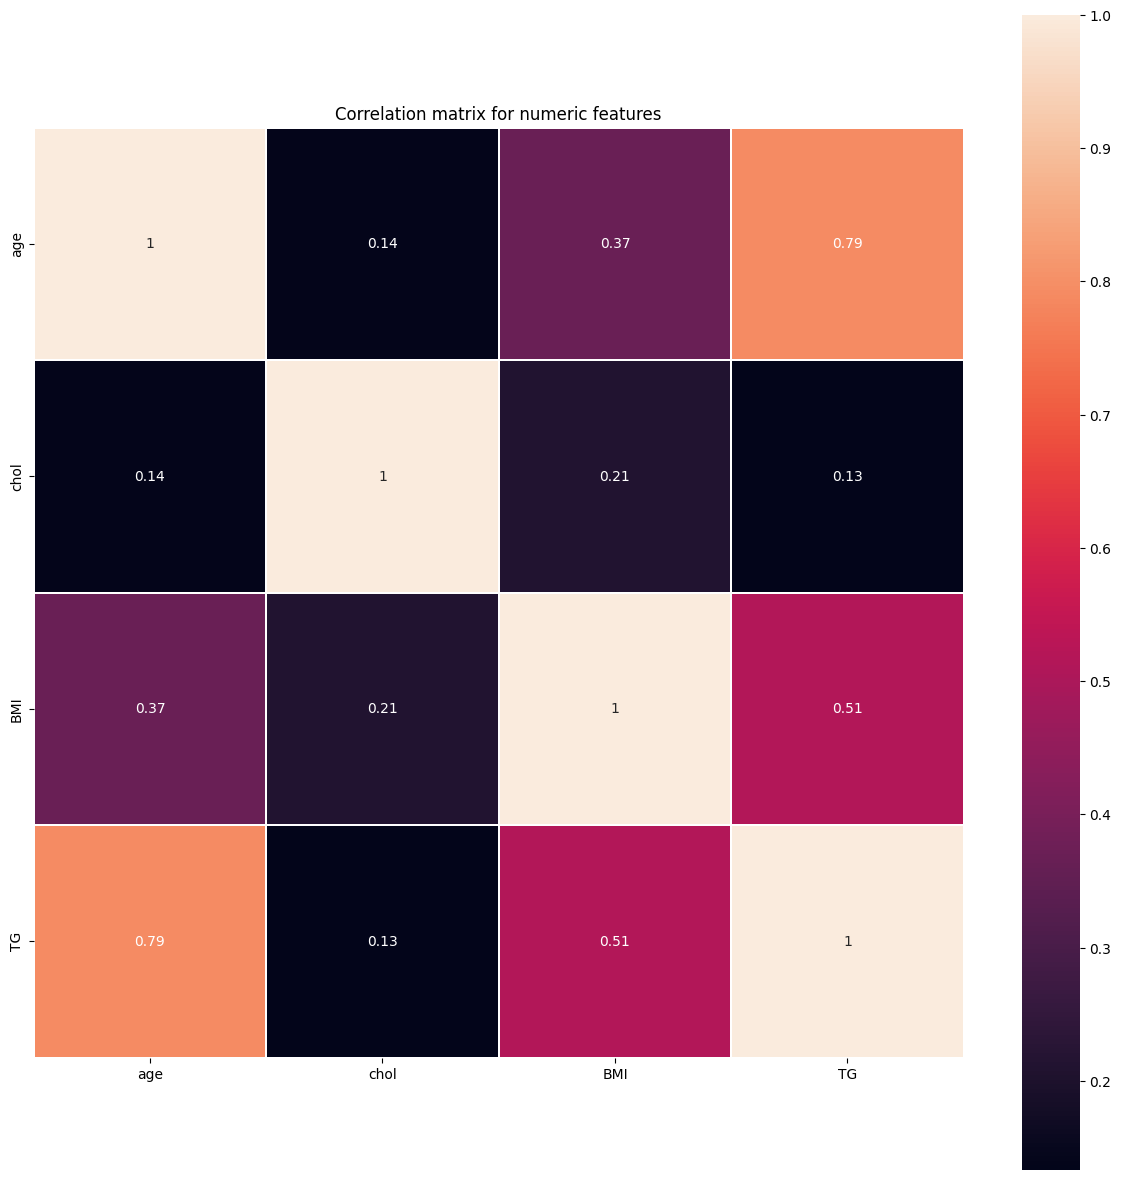

In [ ]:
import seaborn as sns

correlations = df[['age', 'chol', 'BMI', 'TG']].corr(method='spearman') # try pearson

plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix for numeric features")
plt.show()

> Наблюдается высокий уровень корреляции между TG & age
>
> Также заметна корреляция между TG & BMI
>
> Уровень холестерина немного коррелирует с BMI (то есть чем больше вес человека, тем выше уровень холестерина - наверное, такие люди иногда едят вредную еду, где много холестерина)

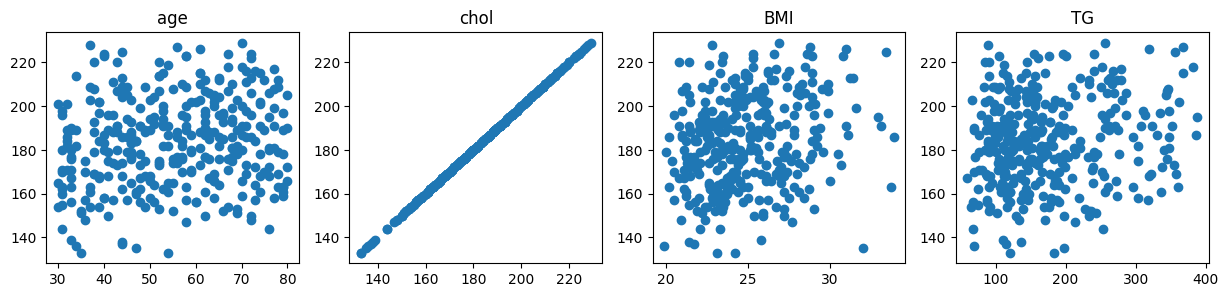

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
axes = axes.ravel()

for ax, col in zip(axes, df[['age', 'chol', 'BMI', 'TG']]):
  ax.scatter(df[col], df['chol'])
  ax.set_title(col)

> Тут можно отметить, что уровень холестерина немного зависит от BMI (индекса массы тела)
>
> Также видна небольжая зависимость между уровнем холестерина и TG

In [ ]:
# Теперь поработаем с категориальными переменными

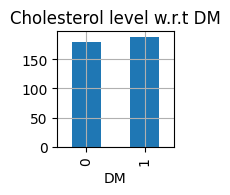

In [ ]:
DM = df.groupby('DM')['chol'].mean()

ax = DM.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t DM",fontsize=12)
ax.grid()

> Чаще уровень холестерина выше у людей, больных диабетом

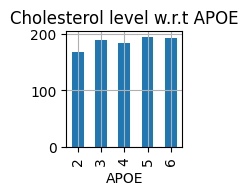

In [ ]:
APOE = df.groupby('APOE')['chol'].mean()

ax = APOE.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t APOE",fontsize=12)
ax.grid()

> Чаще уровень холестерина выше у людей с пятым гаплотипом

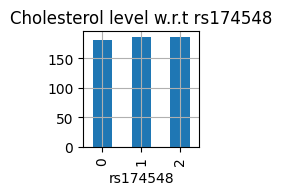

In [ ]:
rs174548 = df.groupby('rs174548')['chol'].mean()

ax = rs174548.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t rs174548",fontsize=12)
ax.grid()

> Чаще уровень холестерина выше у людей с гаплотипом 1 (центральная колонка)

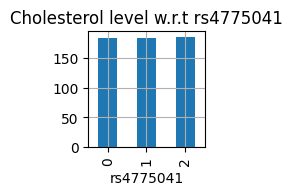

In [ ]:
rs4775041 = df.groupby('rs4775041')['chol'].mean()

ax = rs4775041.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t rs4775041",fontsize=12)
ax.grid()

> Незначительная разница между колонками

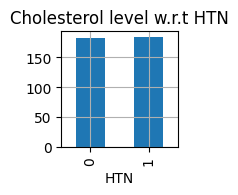

In [ ]:
HTN = df.groupby('HTN')['chol'].mean()

ax = HTN.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t HTN",fontsize=12)
ax.grid()

> Незначительная разница между колонками

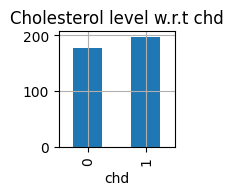

In [ ]:
chd = df.groupby('chd')['chol'].mean()

ax = chd.plot(kind='bar', figsize=(1.5,1.5), fontsize=10)
ax.set_title("Cholesterol level w.r.t chd",fontsize=12)
ax.grid()

> Чаще уровень холестерина выше у людей, которые имеют кардиоваскулярные заболевания

[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?
> Вообще можно, но проблема возникает при сравнении категориальных данных с числовыми, так как никакой числовой зависимости между ними нет

* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?
> Могут, если ID - это число. При обучении тогда будет выявляться зависимость между данными и их ID. Хотя вообще-то зависимости нет. Следовательно, получится чепуха!

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
df.dtypes

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object

In [ ]:
# Всё-таки делаем категориальные данные

for col in 'DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd':
  df[col] = df[col].astype('category')

df.dtypes

DM           category
age             int64
chol            int64
BMI           float64
TG              int64
APOE         category
rs174548     category
rs4775041    category
HTN          category
chd          category
dtype: object

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

print("Before:")
print(f"\tData: {df.shape}")

train, test = train_test_split(df, test_size=0.3, random_state = 42)

print("After:")
print(f"\tTrain: {train.shape}")
print(f"\tTest: {test.shape}")

Before:
	Data: (340, 10)
After:
	Train: (238, 10)
	Test: (102, 10)


> Так как мы решаем задачу **регрессии**, то в качестве метрик для оценки качества модели следует использовать **MSE** и **MAE**. ⛺

[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?
> Масштабирование (приведение к одному масштабу) необходимо, так как признаки могут иметь различные диапазоны значений, что может привести к тому, что модель будет сильнее влиять на признаки с большими значениями и игнорировать признаки с меньшими значениями. Из-за этого модель может оказать неудачной.

* Why do you think we don't produce scaling of One Hot encoded features?
> Эти признаки не надо масштабировать, так как там только 1 (единицы) и 0 (нули). То, что hot - это единицы.


[0.35] Apply transformation to data, if needed. Justfy

---

your choice.

In [ ]:
# Since some of our columns are clearly not normal, let's try power-transforming them:
# Я это делаю, потому что думаю, что так будет лучше

from sklearn.preprocessing import PowerTransformer

cols = ['age', 'chol', 'BMI', 'TG']
# Fit the scaler on train data for choosen columns
scaler = PowerTransformer().fit(train[cols])

# Transform data using trained scaler
for data in train, test:
  data[cols] = scaler.transform(data[cols])

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

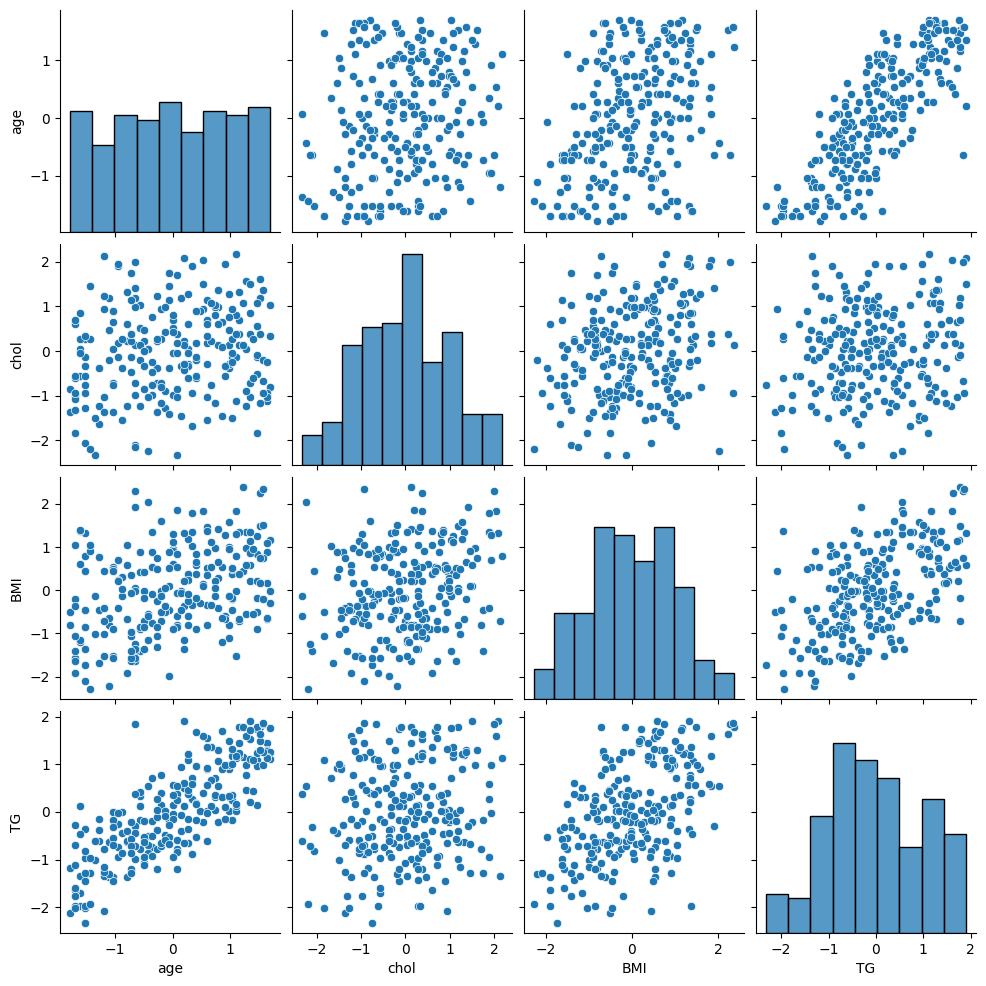

In [ ]:
sns.pairplot(train, vars=cols)

> Что сказать... Не везде получилось нормальное распределение!

In [ ]:
# Get raw numpy arrays
Ytrain, Ytest = train['chol'], test['chol']
features = [x for x in df.columns if x != 'chol']
Xtrain, Xtest = train[features].values, test[features].values

assert Xtrain.shape[0] == Ytrain.shape[0] and Xtest.shape[0] == Ytest.shape[0]
assert Xtrain.shape[1] == Xtest.shape[1] == df.shape[1] - 1

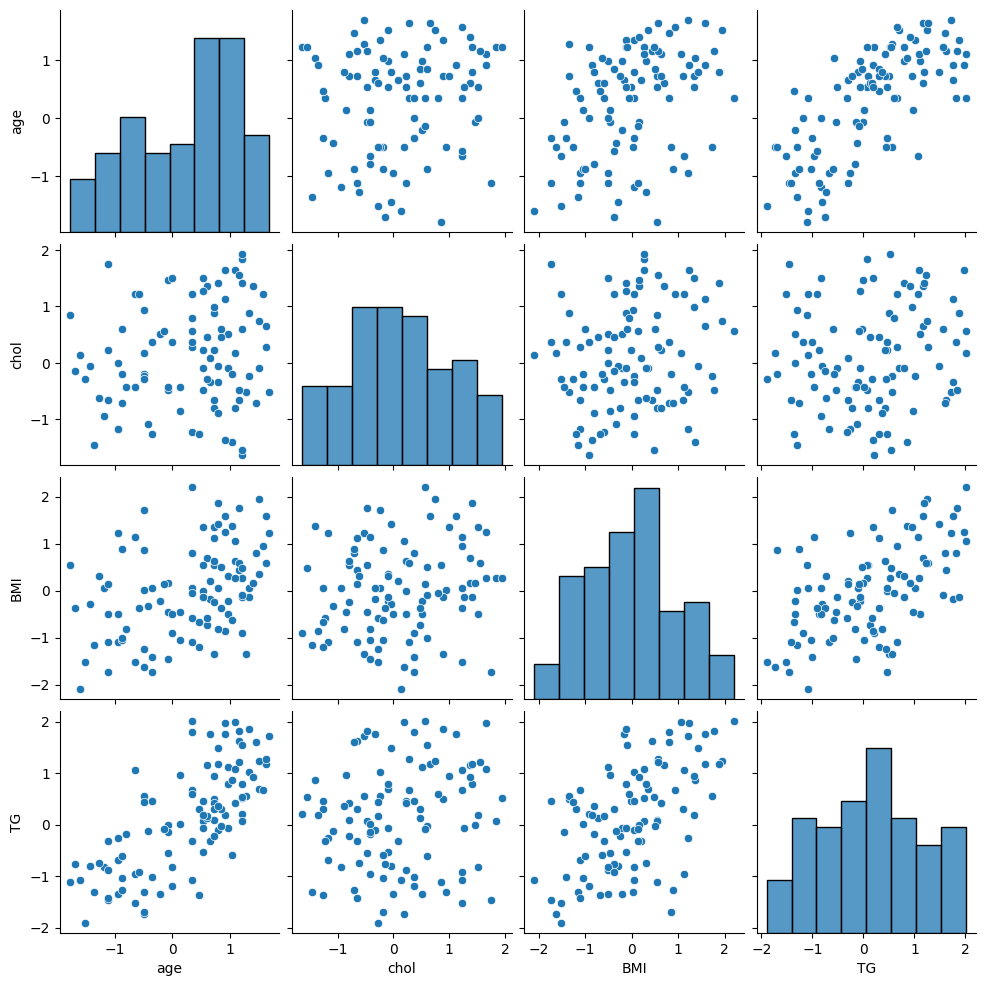

In [ ]:
sns.pairplot(test, vars=cols)

> Мне кажется, что достаточно хорошо получилось

[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?
> Большие веса будут сильно влиять на изменение переменной, но они не обязательно являются самыми важными. "Важность" скорее относится к признаку. Степень важности признака можно определять такими методом как LASSO.

[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
# https://practicaldatascience.co.uk/machine-learning/how-to-create-a-linear-regression-model-using-scikit-learn

# У меня была проблема со следующей ячейкой, и код ниже помог. Было больно 2 часа

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
# Здесь обучаем модель (линейная регрессия) и выводим веса (= коэффициенты).

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
print(lr.coef_)

[ 0.11037491  0.11541662  0.14325501 -0.0777928   0.27034826  0.10029166
 -0.07612051 -0.09263055  0.38384222]


> Как я интерпретирую коэффициенты: чем больше коэффициент (по модулю), тем важнее признак (то есть тем больший вклад вносит он в уровень холестерина).
>
> 0.38384222 - это наибольший коэффициент перед признаком **CHD** (Наличие кардиоваскулярных заболеваний). Также значительный вклад вносит гаплотип Е (**APOE**), *w = 0.27034826*.

In [ ]:
df.dtypes # вывожу, чтобы посмотреть на признаки

DM           category
age             int64
chol            int64
BMI           float64
TG              int64
APOE         category
rs174548     category
rs4775041    category
HTN          category
chd          category
dtype: object

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

In [ ]:
y_pred = lr.predict(Xtest)

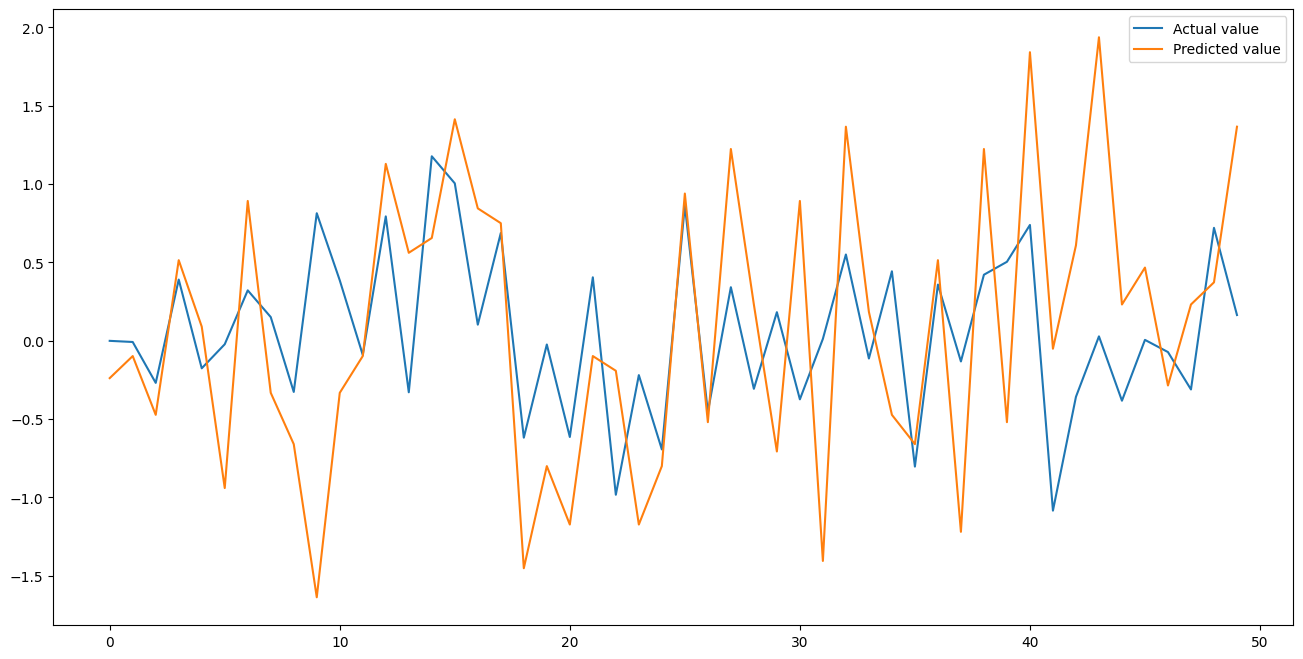

In [ ]:
# https://practicaldatascience.co.uk/machine-learning/how-to-create-a-linear-regression-model-using-scikit-learn

test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':Ytest})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

> Что я вижу: предсказание не совсем убогое, но можно и лучше. Возможно, стоит поэкспериментировать с разбиением на тренировочную и тестовую выборки.

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
# https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression
# Подберем лучший коэффициент альфа

#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(Xtrain, Ytrain)

#score
print(lasso_cv.score(Xtrain, Ytrain))
print(lasso_cv.score(Xtest, Ytest))

0.341070710164076
0.279293494280491


In [ ]:
# методом Ctrl+C Ctrl+V я обнаружила, что alpha = 0.01 (лучший вариант)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(Xtrain, Ytrain)
train_score_ls =lasso.score(Xtrain, Ytrain)
test_score_ls =lasso.score(Xtest,Ytest)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.341070710164076
The test score for ls model is 0.279293494280491


[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

In [ ]:
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]
alphas

[0.0001, 0.001, 0.01, 0.1, 1, 10]

Text(0, 0.5, 'weights')

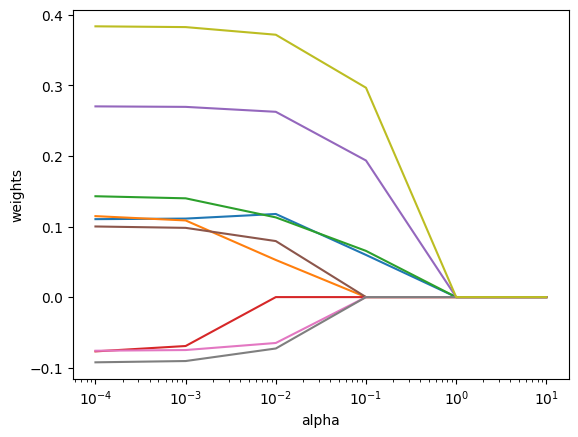

In [ ]:
from sklearn.preprocessing import scale

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(Xtrain), Ytrain)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

>Если избавиться от половины признаков, применяя Lasso, то потеряется часть информации, и это может негативно сказаться на построении модели. Однако, если выбранные признаки были неинформативными или имели высокую корреляцию с другими признаками, то удаление их может даже улучшить качество модели.
>
> То есть если модель содержит слишком много признаков, она может стать слишком сложной и перестать обобщать данные, что приведет к плохому качеству предсказания на новых данных.


[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

In [ ]:
# Elastic Net
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

ElNet = ElasticNet()

grid = {
    'alpha' : [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio' : [0, 0.2, 0.5, 0.8, 1],
    'max_iter' : [10, 100, 1000, 10000, 100000]
    }

gridcv = GridSearchCV(ElNet, grid, cv=5, scoring='r2').fit(Xtrain, Ytrain)

best_model = gridcv.best_estimator_

y_pred = best_model.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.169e+01, tolerance: 1.948e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

In [ ]:
# Elastic Net
print(gridcv.best_params_)
print(gridcv.best_score_)
print()
print( r2_score(Ytest, y_pred) )
print( mean_absolute_error(Ytest, y_pred) )

{'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 10}
0.24300403687807542

0.2767491815113188
0.6344185528087284


In [ ]:
# Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

grid = {
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'alpha' : [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

gridcv = GridSearchCV(ridge, grid, cv=5, scoring='r2').fit(Xtrain, Ytrain)

best_model = gridcv.best_estimator_

y_pred = best_model.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

In [ ]:
# Ridge
print(gridcv.best_params_)
print(gridcv.best_score_)
print()
print( r2_score(Ytest, y_pred) )
print( mean_absolute_error(Ytest, y_pred) )

{'alpha': 100, 'solver': 'lsqr'}
0.2389117775383073

0.2802913404254669
0.6391775069914768


In [ ]:
# SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

SVR = SVR()

grid = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [1, 2, 3, 10, 100, 1000]
}

gridcv = GridSearchCV(SVR, grid, cv=5, scoring='r2').fit(Xtrain, Ytrain)

best_model = gridcv.best_estimator_

y_pred = best_model.predict(Xtest)

In [ ]:
# SVM
print(gridcv.best_params_)
print(gridcv.best_score_)
print()
print( r2_score(Ytest, y_pred) )
print( mean_absolute_error(Ytest, y_pred) )

{'C': 3, 'kernel': 'linear'}
0.17852663739658006

0.26856062504922085
0.6341367154152613


In [ ]:
# KNN
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

grid = {
    'n_neighbors' : [1, 3, 5, 7, 10, 56, 88, 100, 350, 500, 830, 1025, 3040, 5000],
    'metric' : ['cosine', 'minkowski', 'manhattan'],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [30, 2, 1, 50, 100, 10, 1000, 10000],
    'p' : [1, 2]
}

gridcv = GridSearchCV(knn, grid, cv=5, scoring='r2').fit(Xtrain, Ytrain)

best_model = gridcv.best_estimator_

y_pred = best_model.predict(Xtest)

Выходные данные были обрезаны до нескольких последних строк (5000).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py", line 239,

In [ ]:
# KNN
print(gridcv.best_params_)
print(gridcv.best_score_)
print()
print( r2_score(Ytest, y_pred) )
print( mean_absolute_error(Ytest, y_pred) )

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 56, 'p': 1, 'weights': 'distance'}
0.2389028619196485

0.2666897759962895
0.6425154866939822


[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

[0.85] Use test set to rank optimized models. Describe and interpret results.

**Вот какие параметры выводили для каждой модели:**

>print(gridcv.best_params_)

>print(gridcv.best_score_)

>print( r2_score(Ytest, y_pred) )

>print( mean_absolute_error(Ytest, y_pred) )


**Elastic Net**

{'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 10}

0.24300403687807542

0.2767491815113188

0.6344185528087284

**Ridge**

{'alpha': 100, 'solver': 'lsqr'}

0.2389117775383073

0.2802913404254669

0.6391775069914768

**SVM**

{'C': 3, 'kernel': 'linear'}

0.17852663739658006

0.26856062504922085

0.6341367154152613

**KNN**

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 56, 'p': 1, 'weights': 'distance'}

0.2389028619196485

0.2666897759962895

0.6425154866939822

> **Разберу на примере результатов для Elastic Net:**
>
> Значение коэффициента детерминации (R2 score) для тестового набора данных составило 0.276, что означает, что модель объясняет около 27.6% дисперсии целевой переменной.
>
> Средняя абсолютная ошибка (MAE) составляет 0.634, что означает, что модель ошибается в среднем на 0.634 единицы при прогнозировании значений целевой переменной.
>
> Наилучший результат по обеим метрикам (R2 score и MAE) на основе наших данных был достигнут моделью KNN.
>
>Модель SVM показала наихудшие результаты на наших данных.
>
>Среди оставшихся "среднечковых" моделей Elastic Net показала лучший результат метрик (best_score_, R2 score и MAE) по сравнению с моделью Ridge.


[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?
* Would you suggest to use that model to a doctor or use it in a real study?

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ